# Hackathon 1: simulations, descriptive stats & estimation

This project illustrates the course LEPL1109 with an industrial applications of simulations. You will analyse the performance of an assembly chain, analytically and with simulations. This is an introduction to supply chain management which is a field actively studied by engineers (see e.g. LINMA2470 Stochastic modelling). 

## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Martin Servais 01111900

Part. 2: Simon Capiau 17041900

Part. 3: Alexis Victor 61161900

Part. 4: Baptiste Istace 13421900

Part. 5: Louis Caulier 40221900

Part. 6: Otis Van Kerm 35561900


In a manufacture of mechanical devices for the automotive industry, the production of a gearbox is done by a line of 3 successive working stations. The production of a new gearbox starts only when the previous one is fully assembled. In what follows, the assembly time of one gearbox is denoted by $T$. Also, $T_k$ is the assembly time at machine $k$. Finally $\mu_k = \mathbb{E}(T_k)$ and $\sigma^2_k = \mathbb{V}(T)$. Details about the production line are provided in the graph below.

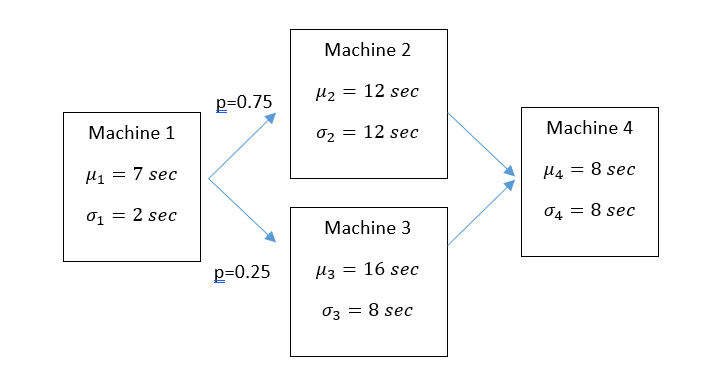

where $p=0.75$ indicates for example that the output of machine 1 ends up in machine 2 with probability $0.75$. 

------------------------------------------------------------------------------------------------------

1.	For each machine $k$, choose a (non-Gaussian) statistical distribution for the assembly time $T_k$ and provide value(s) for its parameter(s).

------------------------------------------------------------------------------------------------------

We chose a gamma distribution, the two parameters are:

$\beta_k = \frac{\sigma_k^2}{\mu_k}$

$\alpha_k = \frac{\mu_k^2}{\sigma_k^2}$

------------------------------------------------------------------------------------------------------------------------

b) Calculate the expected time for assembling one gearbox, $\mathbb{E}(T)$.

------------------------------------------------------------------------------------------------------------------------

$\mathbb{E}(T) = \mathbb{E}(X_1 + 0.75 X_2 + 0.25 X_3 + X_4) = 7 + 0.75*12 + 0.25*16+8 = 28s$


------------------------------------------------------------------------------------------------------

2. Simulate 5000 durations  $T$  for assembling one single gearbox and report the mean (check that its is well close to the expectation of question 1), standard deviation, 5% and 95% percentile. Plot an histogram. Save the simulated durations in a file "sample.csv".

------------------------------------------------------------------------------------------------------

(array([ 10.,  30.,  66., 103., 116., 126., 177., 173., 186., 204., 210.,
        211., 217., 227., 203., 222., 185., 181., 193., 196., 156., 147.,
        128., 120., 120.,  97.,  88.,  91.,  72.,  78.,  69.,  69.,  58.,
         52.,  42.,  46.,  35.,  39.,  26.,  31.,  22.,  14.,  17.,  16.,
         24.,  18.,   9.,   3.,   8.,   5.,   4.,   5.,   5.,   5.,   3.,
          3.,   0.,   5.,   4.,   3.,   3.,   3.,   1.,   5.,   2.,   1.,
          1.,   1.,   1.,   0.,   0.,   2.,   1.,   1.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  5.03139992,   6.28608035,   7.54076079,   8.79544123,
         10.05012167,  11.30480211,  12.55948255,  13.81416298,
         15.06884342,  16.32352386,  17.5782043 ,  18.83288474,
         20.08756518,  21.34224562,  22.59692605,  23.85160649,
         25.10628693,  26.36096737,  27.61564781,  28.87032825

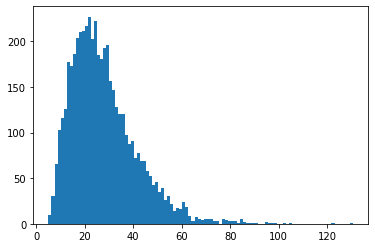

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mu = np.array([7,12, 16, 8])
sigma = np.array([2,12, 8, 8])

alpha = mu**2/sigma**2
beta = sigma**2/mu

results = np.zeros(5000)

for i in range(5000):
    time = 0
    time += np.random.gamma(alpha[0], beta[0], 1)
    if np.random.random() < 0.25:
        time += np.random.gamma(alpha[2], beta[2], 1)
    else:
        time += np.random.gamma(alpha[1], beta[1], 1)
    time += np.random.gamma(alpha[3], beta[3], 1)
    results[i] = time

mean = results.sum()/results.size
standard_deviation = results.std()
five_percentile = np.percentile(results, 5)
ninety_five_percentile = np.percentile(results, 95)

pd.DataFrame(results).to_csv("sample.csv", index=False)

plt.hist(results, bins = 100)



------------------------------------------------------------------------------------------------------


3. a) Load simulated data from the file "sample.csv". Fit the exponential, gamma and chi-square distributions and estimate their parameters by log-likelihood maximization. Select the best non-Gaussian statistical distribution for  $T$. Justify your choice.

Rem: if you use scipy, set the location parameter to zero with option 'floc=0'.

------------------------------------------------------------------------------------------------------

Answer here


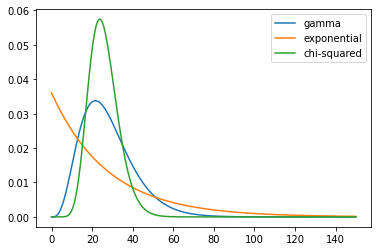

In [3]:
from scipy.stats import chi2, expon, gamma

simulation = pd.read_csv("sample.csv")['0'].tolist()

x = np.linspace(0, 150, 200)

g_a, g_loc, g_scale = gamma.fit(simulation, floc = 0)
e_loc, e_scale = expon.fit(simulation, floc = 0)
c_df, c_loc, c_scale = chi2.fit(simulation, fscale = 1, floc = 0)


plt.plot(x, gamma.pdf(x, g_a, loc = g_loc, scale = g_scale), label = "gamma")
plt.plot(x, expon.pdf(x, loc = e_loc, scale = e_scale), label= "exponential")
plt.plot(x, chi2.pdf(x, c_df, loc = c_loc, scale = c_scale), label = "chi-squared")
plt.legend()


b) During the lectures, we have seen that the chi-square distribution has only one single parameter (the number of degrees of freedom). In Scipy, we find two other parameters location "loc" and scale "scale". Why? 

Answer here


------------------------------------------------------------------------------------------------------

c) Compare the empirical distribution with the distribution you chose at 3a). For this purpose, plot an histogram of  durations and add the probability density function (pdf) that you have selected for modelling the random variable.

------------------------------------------------------------------------------------------------------

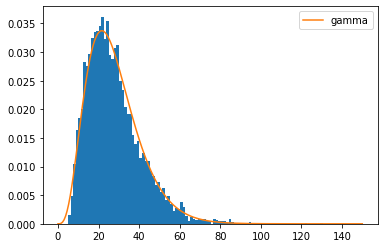

In [4]:
plt.hist(results, bins = 100, density = True)
plt.plot(x, gamma.pdf(x, g_a, loc = g_loc, scale = g_scale), label = "gamma")
plt.legend()


------------------------------------------------------------------------------------------------------

4. We want to fit a Weibull distribution to $T$. The density, $f(t)$, depends upon two parameters $\alpha>0$ and $\lambda>0$ and is given by:

$$ f(t)=\lambda \alpha t^{\alpha-1} \exp(-\lambda t^\alpha) $$

a) Write two functions: one for the density and one that computes the log-likelihood of a sample of durations for this distribution. Test this function on the simulated dataset and for $\alpha=1$ and $\lambda=\frac{1}{28}$

------------------------------------------------------------------------------------------------------

-21622.002737434377


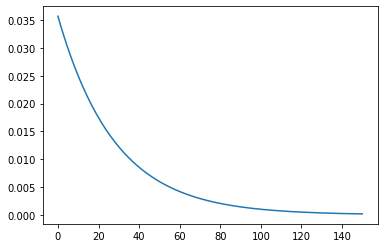

In [5]:
def Weibull(param, t):
    """
    Param : tuple avec les parametres (alpha, lambda)
    Returns the Weibull distributions for parameters alpha and lambda (lam) evaluated at t (can be a numpy array)
    """
    return param[1] * param[0] * np.power(t, param[0]-1) * np.exp(-param[1]* np.power(t,param[0]))

def log_likelihood_Weibull(param, data):
    """
    Returns the log-likelihood of the Weibull distribution for a given data set
    """
    return np.sum(np.log(Weibull(param, data)))


param = (1, 1/28,)
x = np.linspace(0, 150, 200)
f = Weibull(param, x)
print(log_likelihood_Weibull(param, results))
plt.plot(x, f)


------------------------------------------------------------------------------------------------------

b) Maximize the log-likelihood to find estimates $\hat{\alpha}$ and $\hat{\lambda}$. Next compare the log-likelihood with those computed previously. Is this model better?

Hint: use the "scipy.optimize" package and the function "minimize". To avoid adding constraints, you can do a change of variables: $\alpha=\exp(a)$ and $\lambda=\exp(b)$. The function "minimize" may send back a warning (division by zero in log) but converges well to the solution.

------------------------------------------------------------------------------------------------------

(2.1574170259757053, 0.0005869402151682915)
-19785.925088479882


C:\Users\sacha\AppData\Local\Temp/ipykernel_21384/467810289.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(Weibull_exp(param, data)))
C:\Users\sacha\OneDrive - UCL\Bureau\School\BAC3\Q5\LEPL1109 - Stats\lepl1109-env\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\sacha\AppData\Local\Temp/ipykernel_21384/467810289.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(Weibull_exp(param, data)))


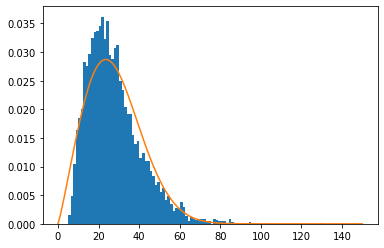

In [6]:
from scipy.optimize import minimize

def Weibull_exp(param, t):
    """
    Arg :param : tuple (a, b) avec alpha = exp(a) et lambda = exp(b)
    Returns the Weibull distributions for parameters alpha and lambda (lam) evaluated at t (can be a numpy array)
    """
    return np.exp(param[1]) * np.exp(param[0]) * np.power(t, np.exp(param[0])-1) * np.exp(-np.exp(param[1])* np.power(t,np.exp(param[0])))

def minus_log_likelihood_Weibull_exp(param, data):
    """
    Returns the log-likelihood of the Weibull distribution for a given data set
    """
    return -np.sum(np.log(Weibull_exp(param, data)))

start = (np.log(1), np.log(1/28),)
p = minimize(minus_log_likelihood_Weibull_exp, start, args = results)

final_parametres = (np.exp(p.x[0]), np.exp(p.x[1]),)
print(final_parametres)
print(log_likelihood_Weibull(final_parametres, results))

plt.hist(results, bins = 100, density = True)
plt.plot(x, Weibull(final_parametres, x))



------------------------------------------------------------------------------------------------------

c) The expectation and variance of the Weibull distribution are 
$$ \mathbb{E}(T)=\lambda^{-\frac{1}{\alpha}}\Gamma(\frac{1}{\alpha}+1) $$

$$ \mathbb{V}(T)=\lambda^{-\frac{2}{\alpha}} \left(  \Gamma(\frac{2}{\alpha}+1) -\Gamma(\frac{1}{\alpha}+1)^2  \right) $$

Estimate $\alpha$  and $\lambda$ by the methods of moments. Next calculate the log-likelihood with these estimates and compare with these obtained by log-likelihood maximization. Is the result surprising ?

Hint: use the scipy.optimize package and the function "root". The gamma function is scipy.special.gamma(z)

------------------------------------------------------------------------------------------------------

In [105]:
from scipy.special import gamma as g
from scipy.optimize import root

M = np.sum(results)/5000
S2 = np.sum(np.power(results - M, 2))/4999

def to_root(x):
    return[np.exp(x[1])**(-1/np.exp(x[0])) * g(1/np.exp(x[0]) + 1) - M,
           np.exp(x[1])**(-2/np.exp(x[0])) * (g(2/np.exp(x[0]) + 1) - g(1/np.exp(x[0]) + 1)**2) - S2]

roots = root(to_root, (np.log(1), np.log(1/28),))
moments_parametres = np.exp(roots.x)
print(log_likelihood_Weibull(moments_parametres, results))


-19797.855673253012


------------------------------------------------------------------------------------------------------

5.	Based on the content of the “Self-learning 2”, Bootstrap 1000 times the sample of durations simulated in Question 2 (stored in the file "sample.csv") and compute, the mean, standard deviation and 95% and 90% confidence interval for parameter(s) estimate(s). Plot the empirical distribution of parameter(s).

------------------------------------------------------------------------------------------------------

In [106]:
import random as rn
bet=np.zeros((1000, 2))
for i in range(1000):
    partition = rn.choices(population=results, k=5000)
    betm = gamma.fit(data=partition,floc=0)
    bet[i, 0] = betm[0]
    bet[i, 1] = betm[2]
    
alpha_mean = np.mean(bet[:, 0])
beta_mean = np.mean(bet[:, 1])

alpha_std = np.std(bet[:, 0])
beta_std = np.std(bet[:, 1])

-----------------------------------------------------------------------------------------------------

6. Using simulated assembling times, determine the probability that assembling 10 gearboxes lasts less than 320 seconds $P(T\leq 320\,sec)$. 

------------------------------------------------------------------------------------------------------

In [107]:
N = 100000
count = 0
for i in range(N):
    choices = rn.choices(results, k = 10)
    if(np.sum(choices) <= 320):
        count += 1
    
P = count/N

print(P)


0.83454


------------------------------------------------------------------------------------------------------

7. Is there any alternative to numerical computing in question 6 for approximating  $P(T\leq 320\,sec)$? Please detail your answer and provide an estimate of this probability.

------------------------------------------------------------------------------------------------------

Answer here
